In [3]:
import sklearn
print(sklearn.__version__)

1.0.1


In [53]:
!pip install tensorflow

     |████████████████████████████████| 212.0 MB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 8.5 MB/s  eta 0:00:01
     |████████████████████████████████| 1.6 MB 40.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 30.0 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 20.0 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 8.8 MB/s  eta 0:00:01
     |████████████████████████████████| 4.0 MB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 36.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 49.7 MB/s eta 0:00:01
     |████████████████████████████

Data Loading

In [11]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [14]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [15]:
# Adding the data array into a pandas dataframe with feature names as the columns

df = pd.DataFrame(housing.data, columns = housing.feature_names)

In [18]:
# Adding the target to the pandas dataframe

df['MedHouseVal'] = housing.target

In [20]:
# Shuffling the data

housing_pd_shuffled = df.sample(n=len(df), random_state=1)
housing_pd_shuffled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.55000
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.70700
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.29400
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.12500
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.25400
...,...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,2.05300
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,5.00001
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,1.04800
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,1.40700


In [21]:
housing_pd_shuffled.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [23]:
housing_pd_final = housing_pd_shuffled[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal']]
housing_pd_final

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
4712,3.2500,39.0,4.503205,1.073718,1109.0,1.777244,34.06,-118.36,3.55000
2151,1.9784,37.0,4.988584,1.038813,1143.0,2.609589,36.78,-119.78,0.70700
15927,4.0132,46.0,4.480296,1.012315,1534.0,3.778325,37.73,-122.42,2.29400
82,1.5208,52.0,3.908046,1.114943,200.0,2.298851,37.81,-122.28,1.12500
8161,5.1795,37.0,5.406360,1.024735,711.0,2.512367,33.82,-118.13,2.25400
...,...,...,...,...,...,...,...,...,...
10955,1.7823,17.0,4.055046,1.087156,1079.0,2.474771,33.76,-117.88,2.05300
17289,8.5608,42.0,6.788462,1.011538,753.0,2.896154,34.42,-119.63,5.00001
5192,1.1326,42.0,4.890785,1.006826,775.0,2.645051,33.93,-118.26,1.04800
12172,2.6322,10.0,4.991614,0.951782,1323.0,2.773585,33.73,-117.16,1.40700


In [25]:
# Removing any null values

housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20640

### Splitting the data into train, test, and validation. 
The reason why it is split into three different sets is because we are going to train on multiple models therefore we need to train and vlaidate in order to find the best model and then test that model on unseen data which will be the test set.

In [28]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19317], housing_pd_final[19317:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1317, 1323)

In [29]:
# Convert the datasets into to numpy to turn the data into matricies and vectors

X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 8), (18000,), (1323, 8), (1323,), (1317, 8), (1317,))

## Standardizing the data
The data needs to be scaled propotionally. At the moment the data changes from say 2.4 to 3.9 in one column but in another column the data changes from 39 to 52. this will cause some descripancies. 

Sklearn standardizes features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

In [40]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :9])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :9])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)

In [41]:
X_train.shape, X_val.shape, X_test.shape

((18000, 8), (1323, 8), (1317, 8))

In [42]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7
0,-0.326714,0.821538,-0.389403,-0.051331,-0.277489,-0.117692,-0.735774,0.603759
1,-0.994425,0.662214,-0.184353,-0.132618,-0.247401,-0.042808,0.536923,-0.105061
2,0.074038,1.379173,-0.399081,-0.194325,0.098611,0.062339,0.981431,-1.422866
3,-1.234708,1.857146,-0.640830,0.044673,-1.081900,-0.070765,1.018864,-1.352983
4,0.686456,0.662214,-0.007862,-0.165402,-0.629695,-0.051555,-0.848071,0.718568


<AxesSubplot:>

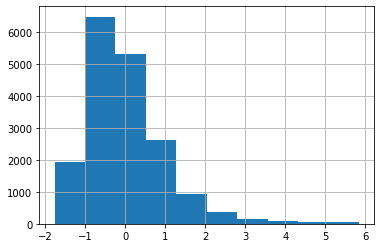

In [43]:
# Checking one of the columns to see how its been scaled

pd.DataFrame(X_train)[0].hist()

### Building models
The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss.

The lower the mse the better.

The mse of the train data will be measured against the validation data. The model with the following attributes will be the one seen as the best model:

- The model has the lowest mse on both the train and validation data set
- The mse of the validation data set is close to the train data set

If the mse validation data set is a lot higher than the mse train data than there is an overfitting problem that has occured.

In [45]:
# Linear regression model:
# Tries to draw a line through the data set where it tries to cross as many points as possible.

from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, y_train)
mse(lm.predict(X_train), y_train, squared=False), mse(lm.predict(X_val), y_val, squared=False)

(0.7194433422428514, 0.7775847648082115)

In [50]:
# KNeighborsRegressor model:
# Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete
# variable. The label assigned to a query point is computed based on the mean of the labels of its nearest 
# neighbors.
# Playing around with the n_neighbors variable, you can get reduce overfitting and alos reduce the mse 

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10).fit(X_train, y_train)
mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_val), y_val, squared=False)

(0.5697999121814429, 0.6315675634181342)

In [47]:
# Random forest regressor model:
# A random forest is a meta estimator that fits a number of classifying decision trees on various 
# sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise
# the whole dataset is used to build each tree.

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train), y_train, squared=False), mse(rfr.predict(X_val), y_val, squared=False)

(0.4196509449116906, 0.5426267462615281)

In [51]:
# Gradient boosting regressor model:
# GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of 
# arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative 
# gradient of the given loss function.


from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train), y_train, squared=False), mse(gbr.predict(X_val), y_val, squared=False)

(0.4593389011651014, 0.5029585065005552)

### Creating Neural network models

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [ ]:
simple_nn = Sequential()
simple_nn.add(InputLayer((8,)))
simple_nn.add(Dense(2, 'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

In [58]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train), y_train, squared=False), mse(simple_nn.predict(X_val), y_val, squared=False)

(0.6488766195777967, 0.6661714670366922)

In [ ]:
medium_nn = Sequential()
medium_nn.add(InputLayer((8,)))
medium_nn.add(Dense(8, 'relu'))
medium_nn.add(Dense(4, 'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

In [60]:
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train), y_train, squared=False), mse(medium_nn.predict(X_val), y_val, squared=False)

(0.6419608714414149, 0.6538553666941065)

In [ ]:
large_nn = Sequential()
large_nn.add(InputLayer((8,)))
large_nn.add(Dense(256, 'relu'))
large_nn.add(Dense(128, 'relu'))
large_nn.add(Dense(64, 'relu'))
large_nn.add(Dense(32, 'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp = ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse', metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

In [63]:
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train), y_train, squared=False), mse(large_nn.predict(X_val), y_val, squared=False)

(1.1529580665827441, 1.1585704124972334)

In [64]:
mse(gbr.predict(X_test), y_test, squared=False)

0.5143736607106968

In [65]:
gbr.score(X_test, y_test)

0.80420993025988